In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#loading the data from csv file to pandas dataframe
df=pd.read_csv('C:/Users/Krishna/Desktop/Datasets/car data.csv')

In [3]:
#first five rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [5]:
#checking the no of rows and columns
df.shape




(301, 9)

In [6]:
#getting some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#checking the no of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
#splitting the data into training and testing
X=df.drop(["Car_Name","Selling_Price"],axis=1)


In [12]:
Y=df["Selling_Price"]

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

In [16]:
X_train.shape

(201, 7)

In [17]:
X_test.shape

(100, 7)

In [18]:
#model training
lm=LinearRegression()

In [19]:
lm.fit(X_train,Y_train)

LinearRegression()

In [20]:
#model evaluation
#prediction on training data
training_data_prediction=lm.predict(X_train)

In [21]:
print(training_data_prediction)

[ 4.03665063e+00  4.11287020e+00  9.32201976e-02  1.98407735e+00
  1.74969372e+00  7.22207587e+00  1.27632887e+00 -1.20320073e+00
 -7.16427891e-02  2.66623228e+00  5.69604970e+00  1.04222371e+00
  3.95865378e+00  2.42275821e+00  5.42119913e+00  1.88691402e+00
  5.52937417e+00  6.91347971e+00  5.96615542e+00  1.09980728e+00
  6.19293665e+00  3.01326668e+00 -4.16897887e+00  9.23429654e+00
  4.22184213e+00  1.83610983e+00  5.93562862e+00  7.61642993e+00
  2.01417784e+01  6.10782366e+00  5.76119980e+00  4.93508646e+00
 -2.07561534e+00  4.12606759e+01  8.67259318e-01  2.87077253e+00
  6.08318578e+00  3.27731040e+00  2.80155564e+00  7.08262129e-01
  7.17642052e+00  2.08752733e-01  3.89176812e+00  4.48597649e+00
  3.24549742e-01  1.67736671e+00  4.87535053e+00  5.09148208e+00
  6.24605105e+00  7.17632293e+00  7.21587942e+00  2.25744987e+00
  9.77675642e+00  3.94581361e-01  1.52157543e+00  6.34561464e+00
  5.15635041e+00  7.29816061e+00  3.82569419e+00  4.12673925e+00
  5.72822352e-01  2.09672

In [22]:
#R square error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R error score is:",error_score)

R error score is: 0.8915509888825645


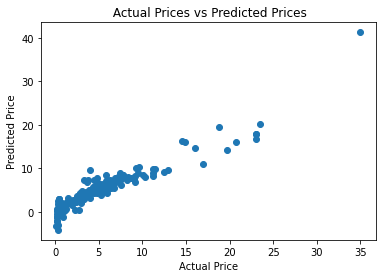

In [23]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [24]:
test_data=lm.predict(X_test)

In [25]:
test_data

array([ 7.84361557,  0.71878799,  1.98204954,  1.97405745,  5.28856332,
        6.70938767, 19.82108553, -3.73290911,  0.97086323,  4.47476285,
       -0.04538692,  8.81834071,  4.42018228, -0.99106105,  5.88281909,
        3.5098188 ,  4.55308131, -5.74886899,  2.74370499,  5.90230867,
        1.95065138,  3.39638098,  7.34903765, 21.4643125 , -1.63311556,
        0.97381041, -1.18801072, -3.10368169,  1.46373414, -3.37664797,
       -0.14731975, 14.21913377,  4.59592997,  7.87787355, -0.0556841 ,
        6.58474371,  2.61893399,  3.62570751,  1.60474339,  4.29584187,
        6.22225164,  0.32665317,  6.42149818,  0.10568732, 10.3995337 ,
        3.49868389, -0.76421167,  4.92890207,  9.03787925,  0.47730463,
       -1.18690879,  6.42102923,  0.8625199 ,  9.75309656,  4.81090556,
        4.51241872,  9.39726018, -0.15379373,  6.89477478,  9.89490878,
        1.50592854, -2.12403437,  2.30584361,  6.37765544,  5.94766647,
        6.67384593,  3.30499348, -0.08178863,  5.03323684,  4.41

In [26]:
#R2 score is how well our model if fitting the line
error_score=metrics.r2_score(Y_test,test_data)
print("R error score is:",error_score)

R error score is: 0.8370192773964837


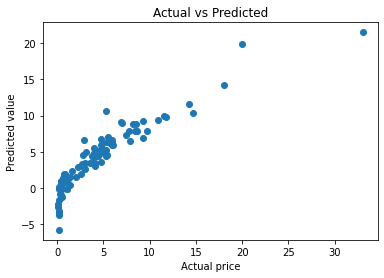

In [27]:
plt.scatter(Y_test,test_data)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted")
plt.show()

In [28]:
#lasso regression
lr=Lasso()

In [29]:
lr.fit(X_train,Y_train)

Lasso()

In [30]:
train_data=lr.predict(X_train)

In [31]:
train_data

array([ 3.56516031e+00,  3.68078613e+00,  1.13219016e+00,  2.84770707e+00,
        2.56644266e+00,  5.50634468e+00,  2.00988198e+00,  1.08749988e+00,
        1.11365494e+00,  2.62400819e+00,  6.19246355e+00,  1.90008982e+00,
        3.80220967e+00,  2.53271513e+00,  5.45810090e+00,  2.56636158e+00,
        5.46622404e+00,  6.54168926e+00,  4.53416216e+00,  1.77455811e+00,
        6.09461176e+00,  2.45311045e+00, -2.33822059e+00,  7.87379544e+00,
        5.24261775e+00,  2.49658636e+00,  5.61631137e+00,  7.72955791e+00,
        1.90347798e+01,  5.98151018e+00,  5.57374193e+00,  3.21108572e+00,
       -6.05000861e-01,  4.56190795e+01,  1.47082293e+00,  2.64167374e+00,
        4.68967684e+00,  3.50296630e+00,  2.74721752e+00,  1.47366974e+00,
        7.05980641e+00,  1.26933420e+00,  3.92217404e+00,  4.39650343e+00,
        1.37165364e+00,  2.48844804e+00,  4.96500032e+00,  4.81966710e+00,
        4.58578507e+00,  5.50517954e+00,  5.53434343e+00,  3.00137594e+00,
        8.62835741e+00,  

In [32]:
#R square error
error_score=metrics.r2_score(Y_train,train_data)
print("R error score is:",error_score)

R error score is: 0.8465667491999447


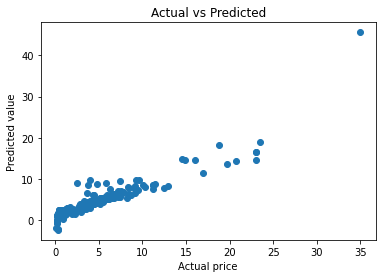

In [33]:
plt.scatter(Y_train,train_data)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted")
plt.show()

In [34]:
test_data=lr.predict(X_test)
test_data

array([ 8.12782335,  1.70782444,  1.95991609,  2.67385794,  4.85686   ,
        5.27898621, 18.84087534, -0.88815669,  1.8150762 ,  4.3816023 ,
        1.16062241,  7.51253969,  4.32417045,  0.35940443,  4.09480439,
        4.68380167,  4.47586198, -7.10091854,  2.5090541 ,  5.86517359,
        2.642755  ,  3.26614813,  5.98843284, 20.30734545,  0.75449561,
        1.8393735 , -0.12225131, -0.28425897,  2.23928757, -1.62075   ,
        0.3126855 , 11.92214344,  4.55771108,  8.17334674,  1.13486149,
        5.12392218,  2.76396226,  3.73368534,  2.5403999 ,  4.00218185,
        4.79884423,  1.19202379,  4.77589981,  0.21436243,  9.0820209 ,
        4.01931947,  0.22957425,  4.73245476,  9.80111919,  2.87702   ,
        0.09990888,  6.92360055,  1.6695955 ,  8.46280272,  4.58094018,
        3.99155485,  8.32521984,  1.19823719,  6.71951244,  8.35961914,
        2.24916514,  0.33438796,  3.05209618,  5.08098004,  4.23004151,
        3.71953137,  3.68217057,  0.90416046,  3.4914783 ,  4.16

In [35]:
#R square error
error_score=metrics.r2_score(Y_test,test_data)
print("R error score is:",error_score)

R error score is: 0.8111163707399749


In [36]:
from sklearn.ensemble import AdaBoostRegressor


In [37]:
abr=AdaBoostRegressor()

In [38]:
abr.fit(X_train,Y_train)

AdaBoostRegressor()

In [39]:
train_data=abr.predict(X_train)

In [40]:
#R square error
error_score=metrics.r2_score(Y_train,train_data)
print("R error score is:",error_score)

R error score is: 0.9680772496384459


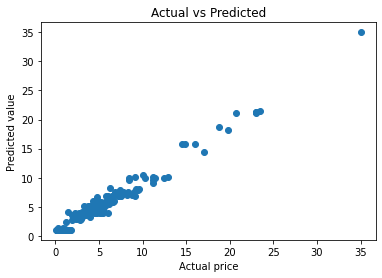

In [41]:
plt.scatter(Y_train,train_data)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted")
plt.show()

In [42]:
test_data=abr.predict(X_test)

In [43]:
#R square error
error_score=metrics.r2_score(Y_test,test_data)
print("R error score is:",error_score)

R error score is: 0.8816639177733395


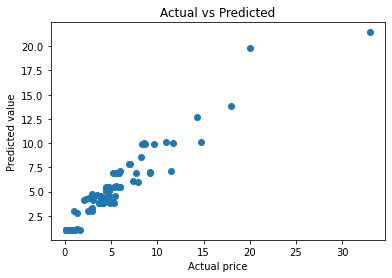

In [44]:
plt.scatter(Y_test,test_data)
plt.xlabel("Actual price")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted")
plt.show()

In [57]:
import pickle

In [58]:
with open('lm.pickle','wb')as f:
    pickle.dump(lm,f)
    

In [59]:
with open('lm.pickle','rb')as f:
    mp=pickle.load(f)

In [60]:
mp.predict([[2014,3.23,45000,1,1,0,1]])

array([1.66833105])